In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
tf.set_random_seed(0)
np.random.seed(0)

In [2]:
mnist = datasets.fetch_mldata('MNIST original', data_home=".")

In [3]:
n = len(mnist.data)
N = 10000
indices = np.random.permutation(range(n))[:N]
X = mnist.data[indices]
y = mnist.target[indices]

In [4]:
Y = np.eye(10)[y.astype(int)]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [6]:
n_in = len(X[0])
n_hidden = 200
n_out = len(Y[0])

In [7]:
x = tf.placeholder(tf.float32, shape=[None,n_in])
t = tf.placeholder(tf.float32, shape=[None,n_out])

W = tf.Variable(tf.truncated_normal([n_in,n_hidden]))
b = tf.Variable(tf.zeros([n_hidden]))
h = tf.nn.sigmoid(tf.matmul(x,W) + b)

V = tf.Variable(tf.truncated_normal([n_hidden,n_out]))
c = tf.Variable(tf.zeros([n_out]))
y = tf.nn.softmax(tf.matmul(h,V) + c)

In [8]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y),reduction_indices=[1]))

In [9]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [10]:
epochs = 100
batch_size = 100
n_batches = N // batch_size

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [12]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)
    #print(epoch)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
    if epoch % 10 == 0:
        print("epoch=%d, accuracy=%g" % (epoch, sess.run(accuracy, feed_dict={ x: X_test, t: Y_test } )))

epoch=0, accuracy=0.4185
epoch=10, accuracy=0.7215
epoch=20, accuracy=0.7665
epoch=30, accuracy=0.7895
epoch=40, accuracy=0.818
epoch=50, accuracy=0.8255
epoch=60, accuracy=0.8385
epoch=70, accuracy=0.8355
epoch=80, accuracy=0.8405
epoch=90, accuracy=0.8515


In [14]:
val_prediction = tf.argmax(y,1)

In [15]:
X_, Y_ = shuffle(X_test, Y_test)
classfied = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:5],
    t: Y_[0:5]
})
prob = y.eval(session=sess, feed_dict={
    x:X_[0:5]
})
val = val_prediction.eval(session=sess, feed_dict={
    x:X_[0:5]
})

In [16]:
print(classfied)
print(prob)
print(val)
print(Y_[0:5])

[ True  True  True  True  True]
[[  7.15914823e-04   6.87976935e-05   8.07222128e-01   6.84024475e-04
    1.03548348e-01   2.19293907e-02   3.75901461e-02   1.04763443e-02
    3.94817488e-03   1.38166202e-02]
 [  5.80199276e-06   7.46414628e-07   9.65303916e-04   6.91345531e-06
    8.14023733e-01   3.04181140e-06   1.66424189e-03   8.74326192e-03
    5.65688452e-03   1.68929994e-01]
 [  7.18304227e-06   3.25414840e-05   3.12508819e-05   9.09409672e-02
    5.47981414e-04   1.40542975e-02   1.09531924e-04   1.12223834e-01
    1.10097299e-03   7.80951440e-01]
 [  1.01537723e-03   2.28320696e-05   1.39875046e-03   7.30853761e-03
    2.10668819e-04   7.06068531e-04   1.14811730e-04   2.08662004e-05
    9.76177633e-01   1.30243618e-02]
 [  5.97381877e-05   4.03993545e-06   6.06852063e-06   4.31665592e-03
    1.70794930e-02   3.02622467e-02   5.36614563e-04   3.72541207e-03
    1.93601120e-02   9.24649596e-01]]
[2 4 9 8 9]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  

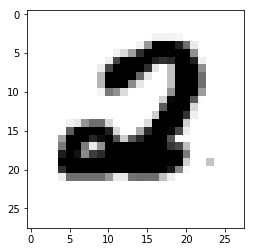

In [17]:
from matplotlib import pyplot as plt
from matplotlib import cm
plt.imshow(X_[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

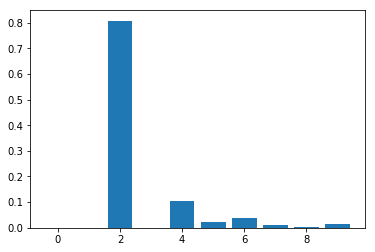

In [18]:
plt.bar(range(10),prob[0])
plt.show()